In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
The more money is spent on health, the <br><br><br>more is the life expectancy at birth: <br><br><br>True or False?</p><br>
## *Mehak Beri*<br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
An open dataset from <a href="https://www.kaggle.com">Kaggle</a> has been used. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset.  Let us have a glimpse of the data stored in this huge dataset.

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


It has different indicators for different countries with the year and value of the indicator. 

### Number of countries in the data set:

In [4]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Number of country codes:

In [5]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Number of indicators in the data set:

In [6]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### Information about years in the data set:

In [7]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
print("The data spans ",len(years)," years")
# What is the range of years?
print("Range of years:")
print(min(years),' to ',max(years))

The data spans  56  years
Range of years:
1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Health Expenditure per capita </p><br>

### Lets pick a country and an indicator to explore: Health Expenditure per capita and the USA

In [8]:
# select health expenditure per capita
hist_indicator = 'Health expenditure per capita \(current'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

healthExp_USA = data[mask1 & mask2]
# number of rows of data
len(healthExp_USA)

19

In [9]:
healthExp_USA.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2613944,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1995,3810.254767
2748910,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1996,3972.163013
2885188,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1997,4142.709560
3022543,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1998,4328.486657
3164467,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1999,4551.944180


### Let's see how health expenditures have changed over time in USA using MatplotLib

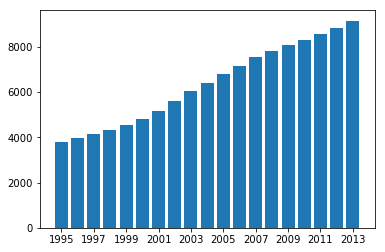

In [10]:
# get the years
years = healthExp_USA['Year'].values
# get the values 
exp = healthExp_USA['Value'].values

# create
plt.bar(years,exp)
plt.xticks(np.arange(min(years), max(years)+1, 2))
plt.show()

It can be seen that there has been a steady increase in the health expenditure in USA

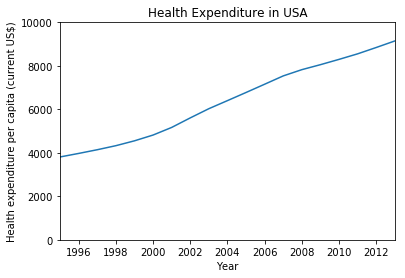

In [11]:
# switch to a line plot
plt.plot(healthExp_USA['Year'].values, healthExp_USA['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(healthExp_USA['IndicatorName'].iloc[0])

#label the figure
plt.title('Health Expenditure in USA')

# to make more honest, start they y axis at 0
plt.axis([1995, 2013,0,10000])

plt.show()

### But how do the USA's numbers relate to those of other countries?

In [12]:
# select health expenditures for all countries in 2011
hist_indicator = 'Health expenditure per capita \(current'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
#mask3 = data['CountryCode'].str.contains("USA")

# apply our mask
exp_2011 = data[mask1 & mask2]
exp_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026437,Arab World,ARB,Health expenditure per capita (current US$),SH.XPD.PCAP,2011,281.493742
5026931,Caribbean small states,CSS,Health expenditure per capita (current US$),SH.XPD.PCAP,2011,524.194728
5027468,Central Europe and the Baltics,CEB,Health expenditure per capita (current US$),SH.XPD.PCAP,2011,950.863686
5028051,East Asia & Pacific (all income levels),EAS,Health expenditure per capita (current US$),SH.XPD.PCAP,2011,593.205938
5028672,East Asia & Pacific (developing only),EAP,Health expenditure per capita (current US$),SH.XPD.PCAP,2011,224.732081


For how many countries do we have health expenditure per capita emissions data in 2011

In [13]:
print(len(exp_2011))

221


### Histogram of health expenditure per capita by country

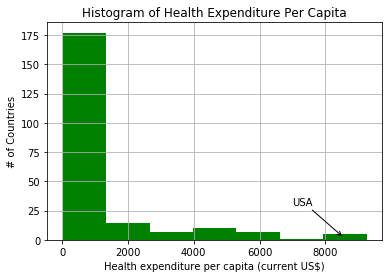

In [14]:

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(8553, 2), xycoords='data',
            xytext=(7000, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(exp_2011['Value'], 7, normed=False, facecolor='green')

plt.xlabel(healthExp_USA['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Health Expenditure Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~8553$ Health expenditure (per capita) is quite high among all countries.



<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Life expectancy at birth, total (years) </p><br><br>

### Lets pick a country and an indicator to explore: Life expectancy at birth in USA

In [15]:
hist_indicator= "Life expectancy at birth, total \(ye"
hist_country= "USA"

mask1= data['IndicatorName'].str.contains(hist_indicator)
mask2= data['CountryCode'].str.contains(hist_country)

lifeExpectancy= data[mask1 & mask2]
lifeExpectancy.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22323,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,69.770732
48803,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,70.270732
77188,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,70.119512
105806,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,69.917073
134844,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,70.165854


<br>
### Let us plot the corresponding values

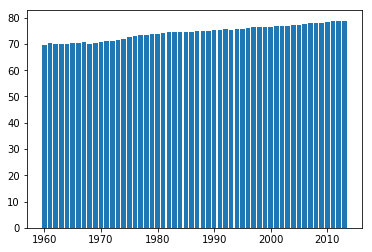

In [16]:
years= lifeExpectancy['Year'].values
age= lifeExpectancy['Value'].values

plt.bar(years,age)
plt.show()


### Histogram of life expectancy by country in the year 2011

In [17]:
hist_indicator= "Life expectancy at birth, total \(ye"
hist_year= 2011
mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2= data['Year'].isin([hist_year])

LE_2011= data[mask1 & mask2]
LE_2011.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026499,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,70.219347
5026997,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,71.572063
5027562,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,75.936907
5028130,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,74.267169
5028773,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,73.346099


For how many countries do we have life expectancy data in 2011?

In [18]:
print(len(LE_2011))

234


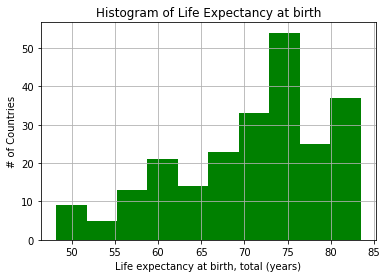

In [19]:
plt.hist(LE_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(lifeExpectancy['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Life Expectancy at birth')

plt.grid(True)

plt.show()

<br><p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Relationship between Health Expenditure and Life Expectancy</p><br>

### Relationship between Health Expenditure and Life Expectancy in USA 

#### ScatterPlot for comparing Health Expenditure and Life Expectancy
First, we'll need to make sure we're looking at the same time frames

In [20]:
print("Life expectancy Min Year =    ", lifeExpectancy['Year'].min(), "  max: ", lifeExpectancy['Year'].max())
print("Health Expenditure Min Year = ", healthExp_USA['Year'].min(), "  max: ", healthExp_USA['Year'].max())

Life expectancy Min Year =     1960   max:  2013
Health Expenditure Min Year =  1995   max:  2013


We have extra years of Health expenditure data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [21]:
LE_trunc = lifeExpectancy[lifeExpectancy['Year'] > 1994]
print(len(LE_trunc))
print(len(healthExp_USA))

19
19


#### Scatterplot

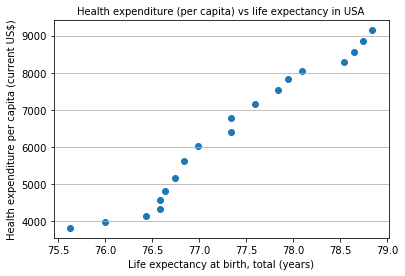

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Health expenditure (per capita) vs life expectancy in USA',fontsize=10)
axis.set_xlabel(LE_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(healthExp_USA['IndicatorName'].iloc[0],fontsize=10)

X = LE_trunc['Value']
Y = healthExp_USA['Value']

axis.scatter(X, Y)
plt.show()

This nearly looks like a linear relationship.  We can test this by looking at correlation.

In [23]:
np.corrcoef(LE_trunc['Value'],healthExp_USA['Value'])

array([[ 1.        ,  0.98152337],
       [ 0.98152337,  1.        ]])

A correlation value of 0.98 indicates a strong correlation.

### Let us look at graphs for some other countries besides USA to get a feel of the general trend

#### INDIA

In [ ]:
hist_indicator= "Health expenditure per capita \(current"
hist_country= "India"
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)

healthExp_IND = data[mask1 & mask2]
# number of rows of data
len(healthExp_IND)

hist_indicator2= "Life expectancy at birth, total \(ye"
mask3= data['IndicatorName'].str.contains(hist_indicator2)

LE_IND= data[mask3 & mask2]

print("Life expectancy Min Year =    ", LE_IND['Year'].min(), "  max: ", LE_IND['Year'].max())
print("Health Expenditure Min Year = ", healthExp_IND['Year'].min(), "  max: ", healthExp_IND['Year'].max())

LE_trunc_IND = LE_IND[LE_IND['Year'] > 1994]
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Health expenditure (per capita) vs life expectancy in India',fontsize=10)
axis.set_xlabel(LE_trunc_IND['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(healthExp_IND['IndicatorName'].iloc[0],fontsize=10)

X = LE_trunc_IND['Value']
Y = healthExp_IND['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(LE_trunc_IND['Value'],healthExp_IND['Value'])

A value of 0.95 indicates a strong correlation.

#### Arab Countries

In [ ]:
hist_indicator= "Health expenditure per capita \(current"
hist_country= "ARB"
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

healthExp_ARB = data[mask1 & mask2]
# number of rows of data
len(healthExp_ARB)

hist_indicator2= "Life expectancy at birth, total \(ye"
mask3= data['IndicatorName'].str.contains(hist_indicator2)

LE_ARB= data[mask3 & mask2]

print("Life expectancy Min Year =    ", LE_ARB['Year'].min(), "  max: ", LE_ARB['Year'].max())
print("Health Expenditure Min Year = ", healthExp_ARB['Year'].min(), "  max: ", healthExp_ARB['Year'].max())

LE_trunc_ARB = LE_ARB[LE_ARB['Year'] > 1994]
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Health expenditure (per capita) vs life expectancy in ARB',fontsize=10)
axis.set_xlabel(LE_trunc_ARB['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(healthExp_ARB['IndicatorName'].iloc[0],fontsize=10)

X = LE_trunc_ARB['Value']
Y = healthExp_ARB['Value']

axis.scatter(X, Y)
plt.show()

y=np.corrcoef(LE_trunc_ARB['Value'],healthExp_ARB['Value'])
y[0,1]

A value of 0.95 indicates a strong correlation.



<br><p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Conclusion</p>

## The graphs and the high correlation values indicate that the more money is spent on health care per capita, the better is the life expectancy of an individual born in that country!

<br>

# *That's all folks!*